Disabling autoscroll for multiple figures.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,7
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = True
import numpy as np

In [13]:
df = pd.read_csv('results.csv.gz')

## Fairness vs. density (nearest alg.)

### "stay", "home", "false"

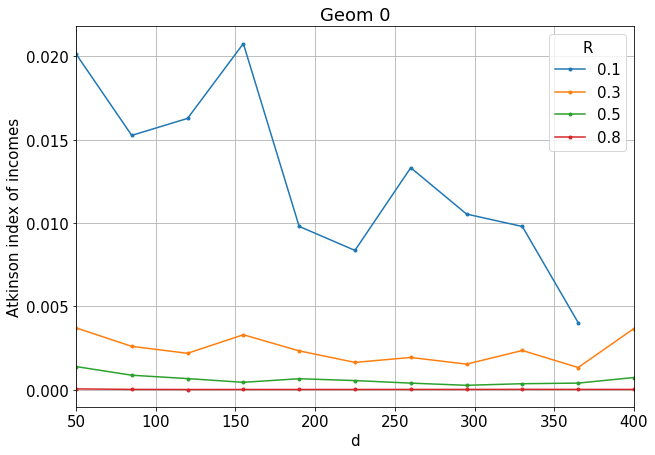

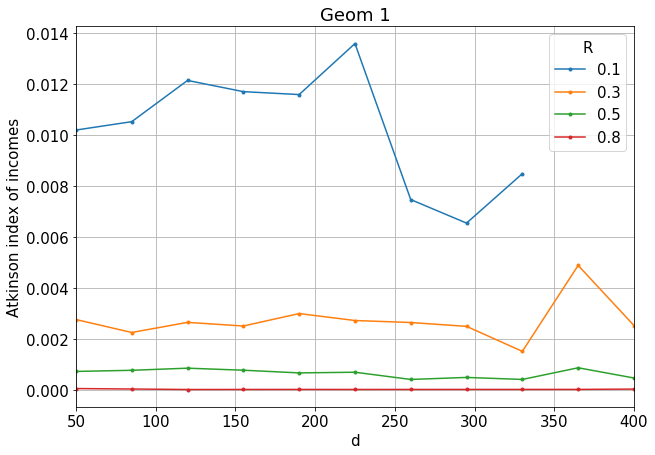

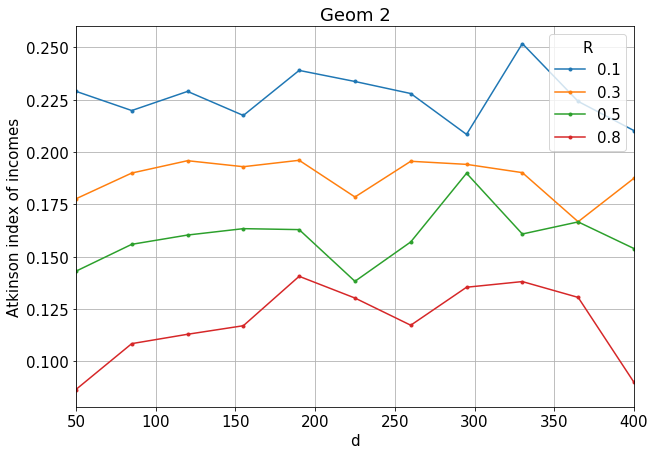

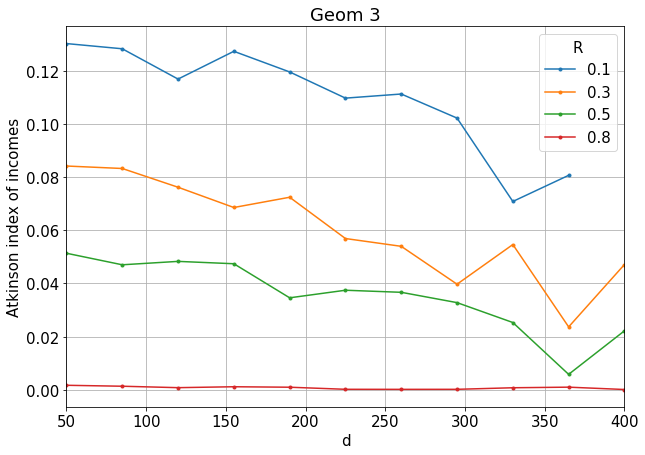

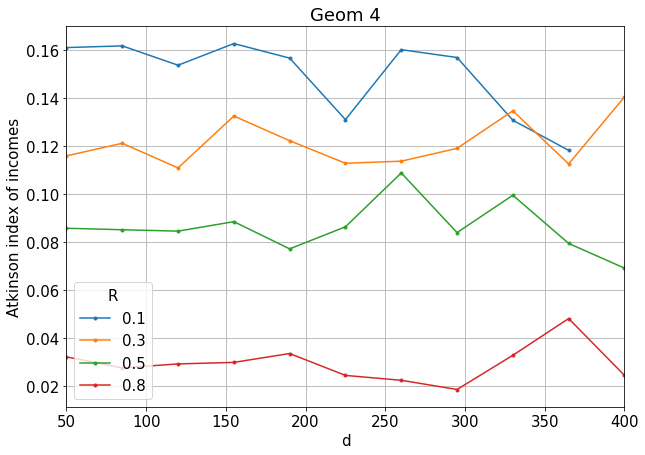

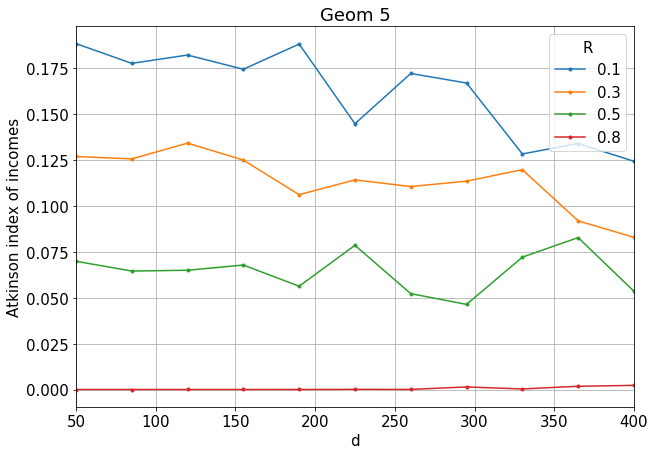

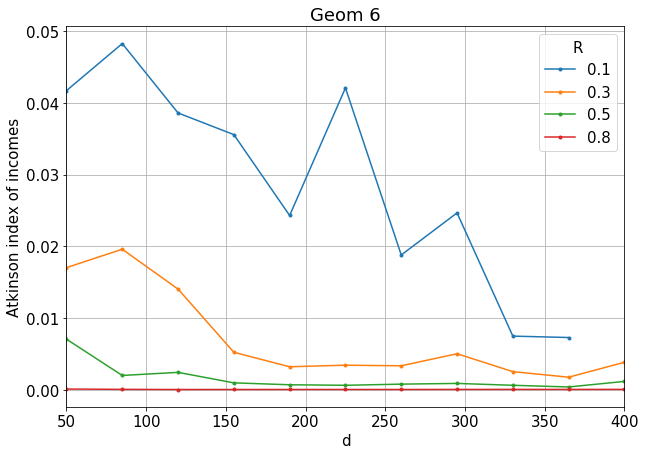

In [40]:
cond1 = df['R'].map(lambda R: R in [0.1,0.3,0.5,0.8])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='d',columns='R',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', inequality as a function of density')
    plt.ylabel('Atkinson index of incomes')

* Miert ilyen ugralosak a gorbek?
* Az R szerinti sorrend mindig megmarad, minel kevesebben vannak a requestek, annal egyenlotlenebb a jovedelmek eloszlasa.
* A reggeli/esti forgalom iranya szamit, nem szimmetrikus a kezdeti es a vegso geometriak felcserelese.
* Mindig olyankor nagyobb az egyenlotlenseg, ha az origin es a destination distribution nem egyezik meg, raadasul akkor nagyobb, ha kifele mennek tobben.


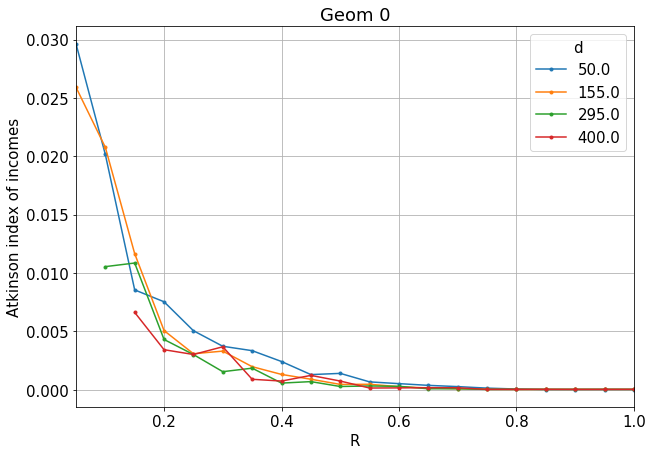

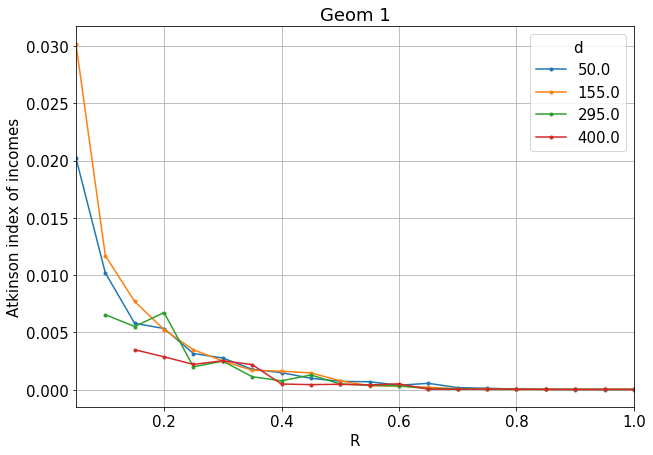

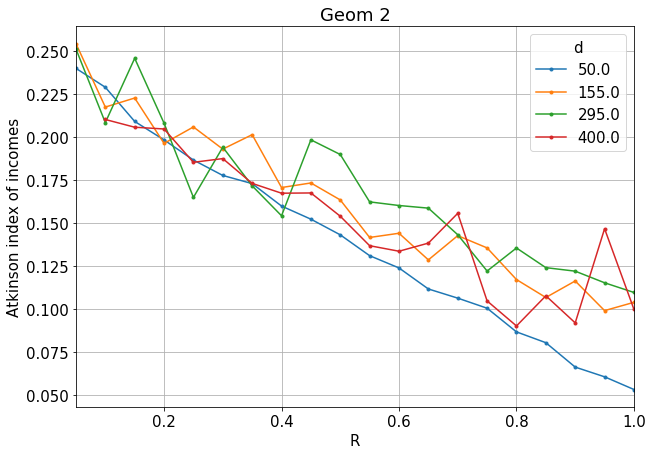

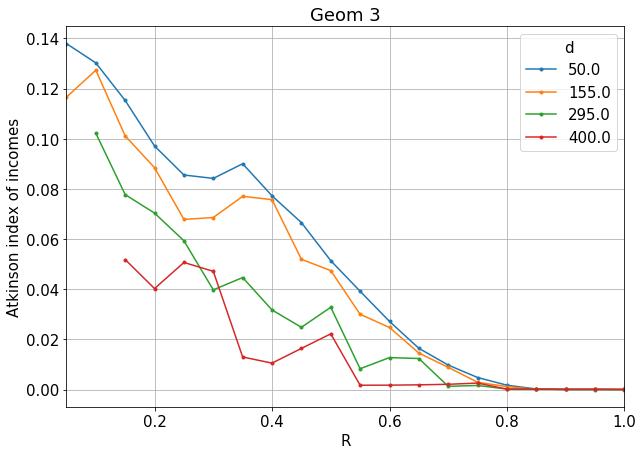

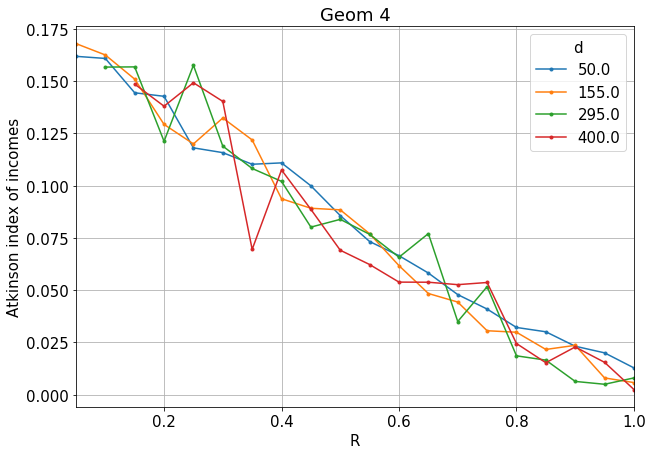

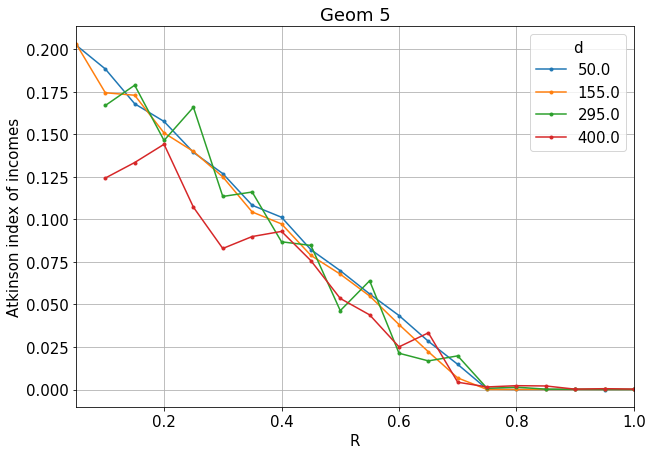

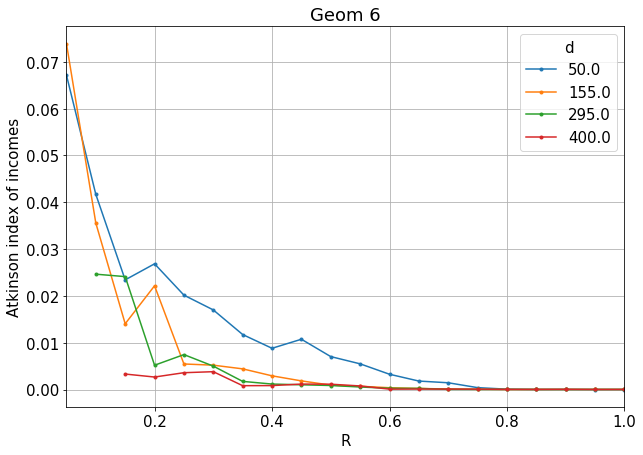

In [39]:
cond1 = df['d'].map(lambda d: d in [50.,155.,295.,400.])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='R',columns='d',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', inequality as a function of requests')
    plt.ylabel('Atkinson index of incomes')

* Az aszimmetrikus geometriaknal nagyobb az egyenlotlenseg.
* Ahogy tobb request van, csokken az egyenlotlenseg.
* De a densityk nem "sorrendben" vannak az abrakon mindenhol (l. Geom 2-3)
* A telitodes utan egyenlo a jovedelmek eloszlasa

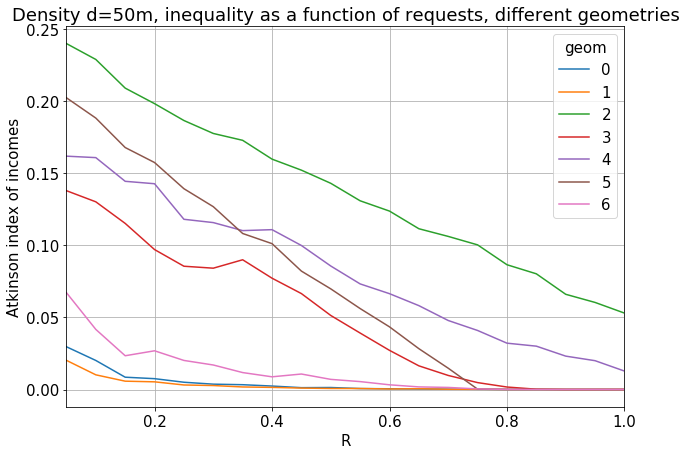

In [41]:
cond1 = df['d']==50
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])


plt.figure(figsize=(20,10))
df[cond1&cond2&cond3][['geom','atkinson','R']].pivot_table(values='atkinson',index='R',columns='geom',aggfunc=lambda x: x).plot()
plt.ylabel('Atkinson index of incomes')
plt.title("Density d=50m, inequality as a function of requests, different geometries")

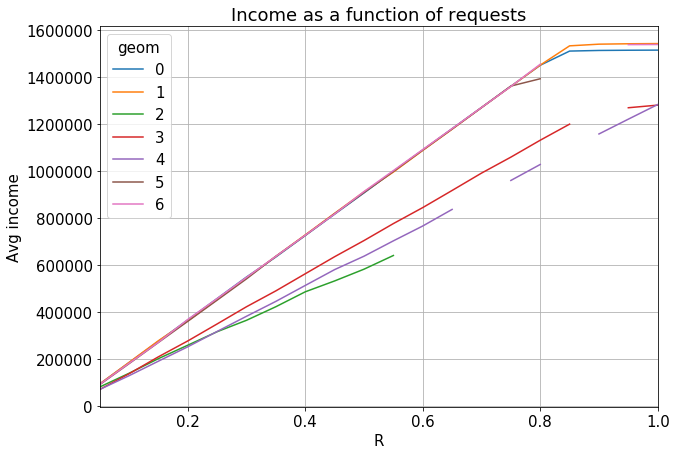

In [42]:
cond1 = df['d']==50
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])


plt.figure(figsize=(20,10))
df[cond1&cond2&cond3][['geom','avg_trip_avg_price','R']].pivot_table(values='avg_trip_avg_price',index='R',columns='geom',aggfunc=lambda x: x).plot()
plt.ylabel('Avg income')
plt.title("Income as a function of requests")

### "go_back", "base", "false"

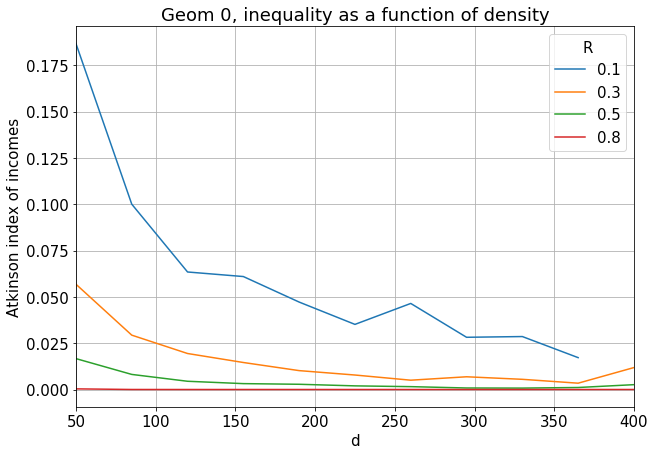

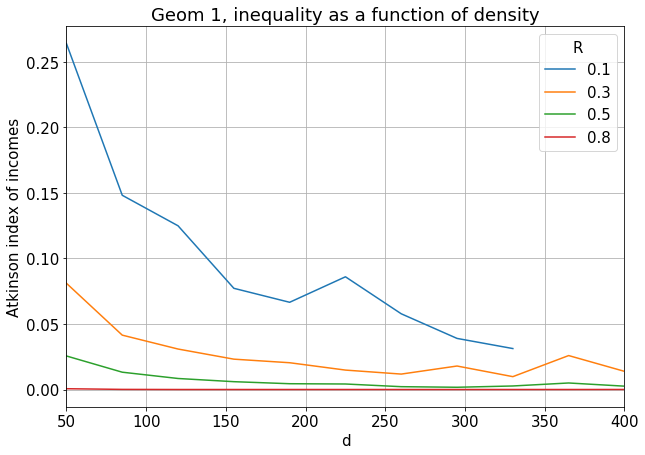

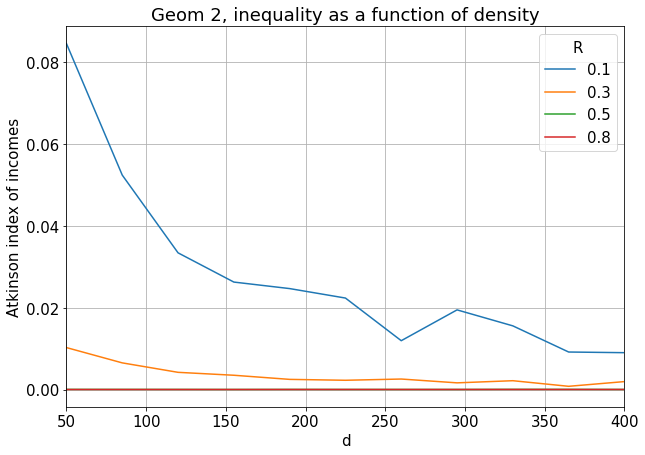

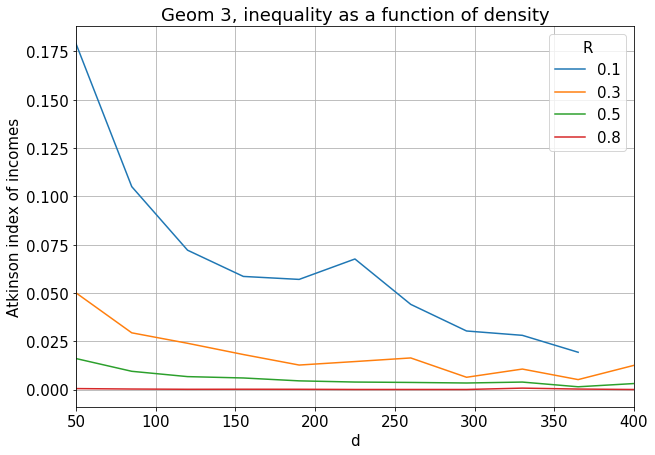

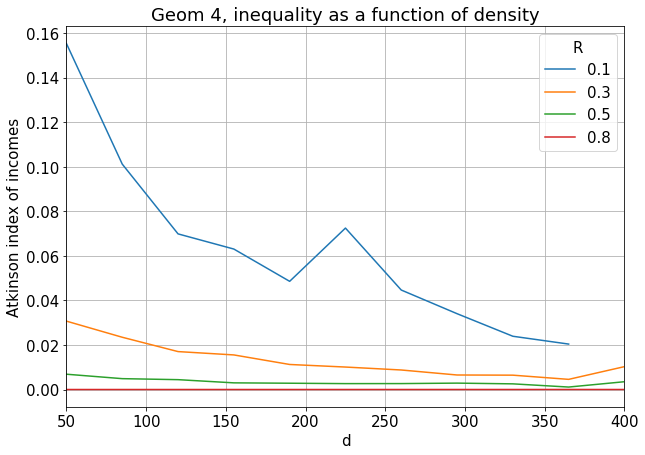

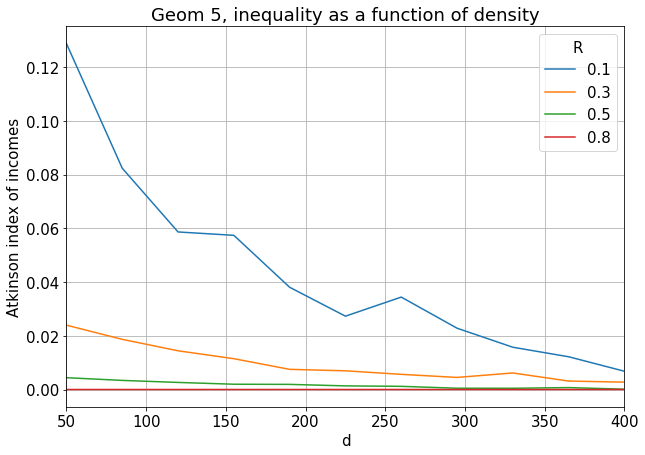

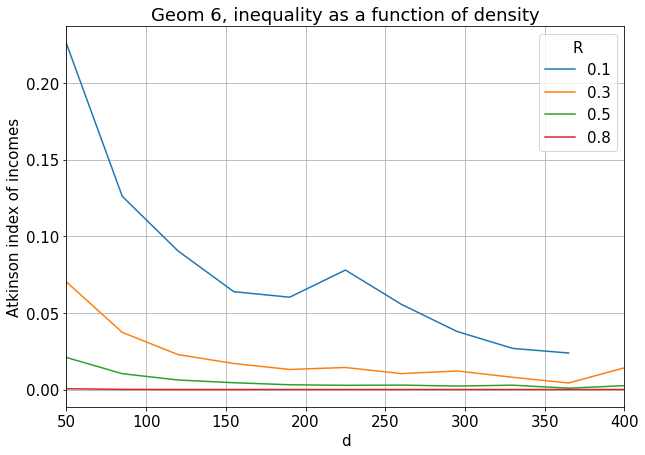

In [38]:
cond1 = df['R'].map(lambda R: R in [0.1,0.3,0.5,0.8])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']].pivot_table(values='atkinson',index='d',columns='R',aggfunc=lambda x: x).plot()
    plt.title('Geom '+str(geom) + ', inequality as a function of density')
    plt.ylabel('Atkinson index of incomes')

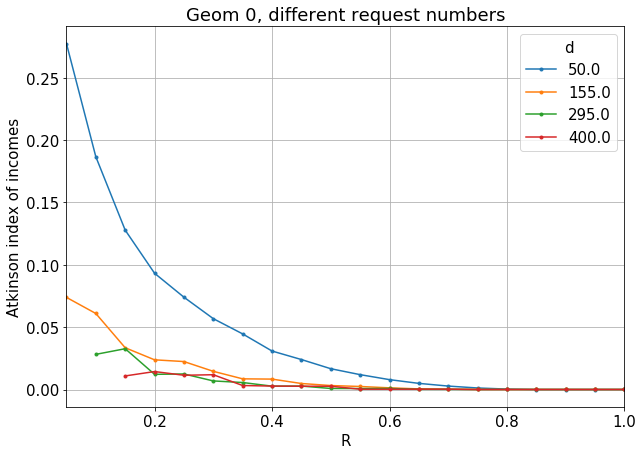

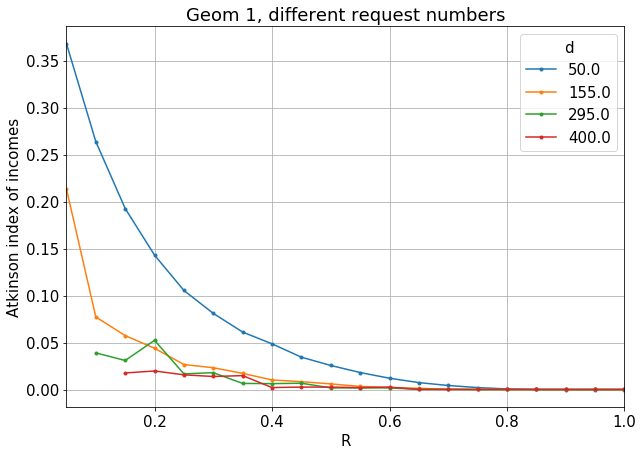

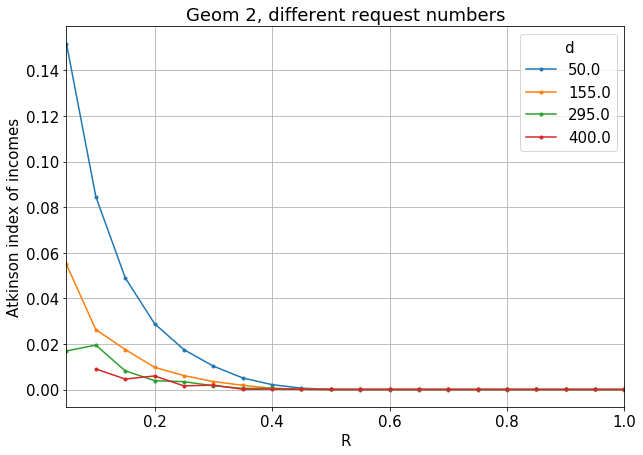

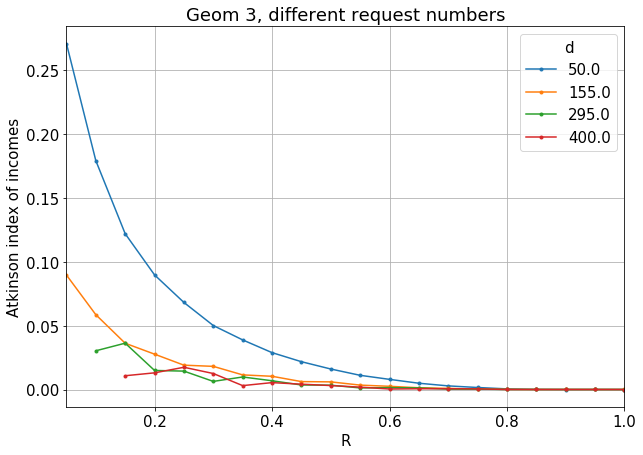

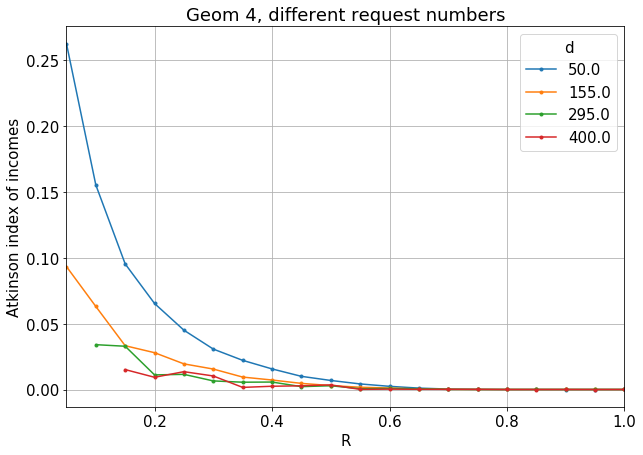

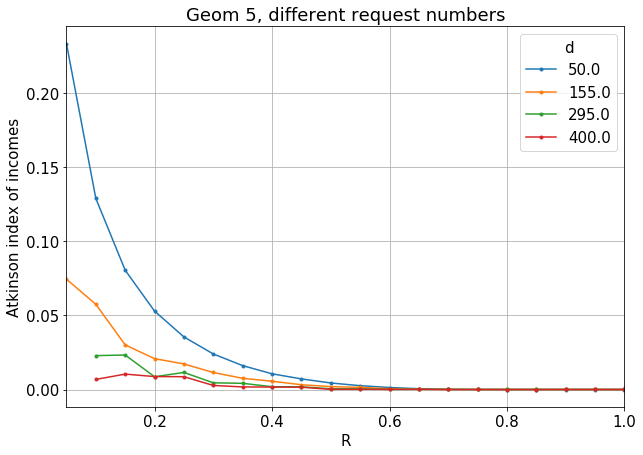

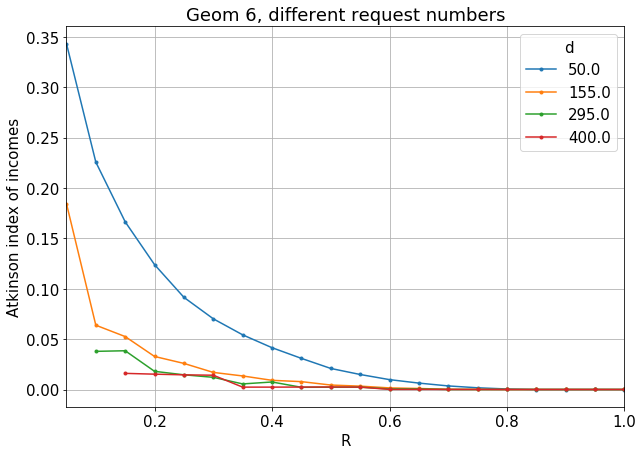

In [37]:
cond1 = df['d'].map(lambda d: d in [50.,155.,295.,400.])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='R',columns='d',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', different request numbers')
    plt.ylabel('Atkinson index of incomes')

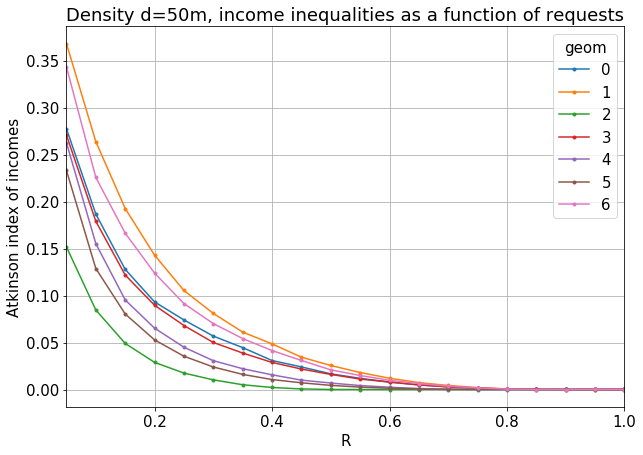

In [35]:
cond1 = df['d']==50
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])


df[cond1&cond2&cond3][['geom','atkinson','R']]\
.pivot_table(values='atkinson',index='R',columns='geom',aggfunc=lambda x: x).plot(style='.-')
plt.ylabel('Atkinson index of incomes')
plt.title('Density d=50m, income inequalities as a function of requests')

### A ket strategia osszehasonlitasa az atlagos jovedelmekben

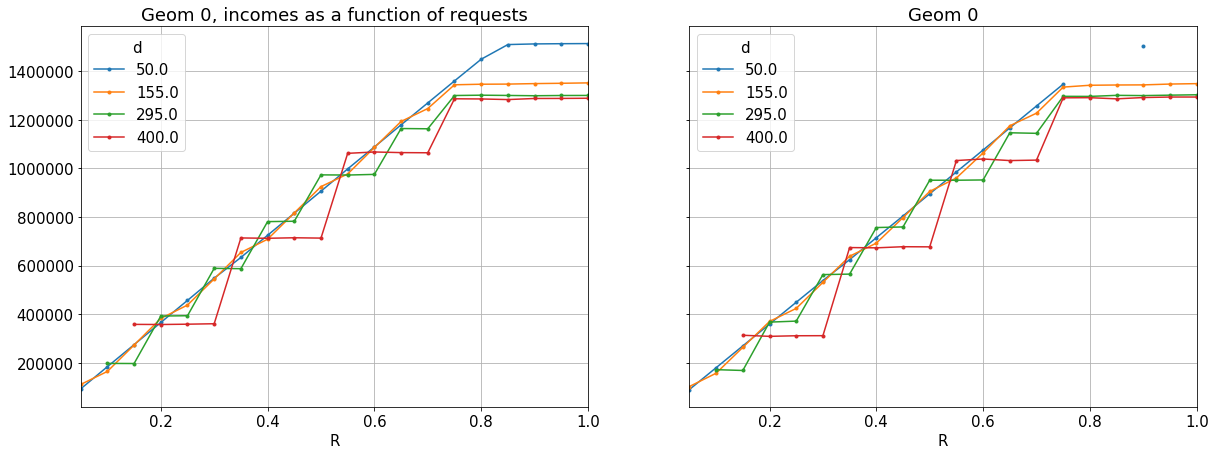

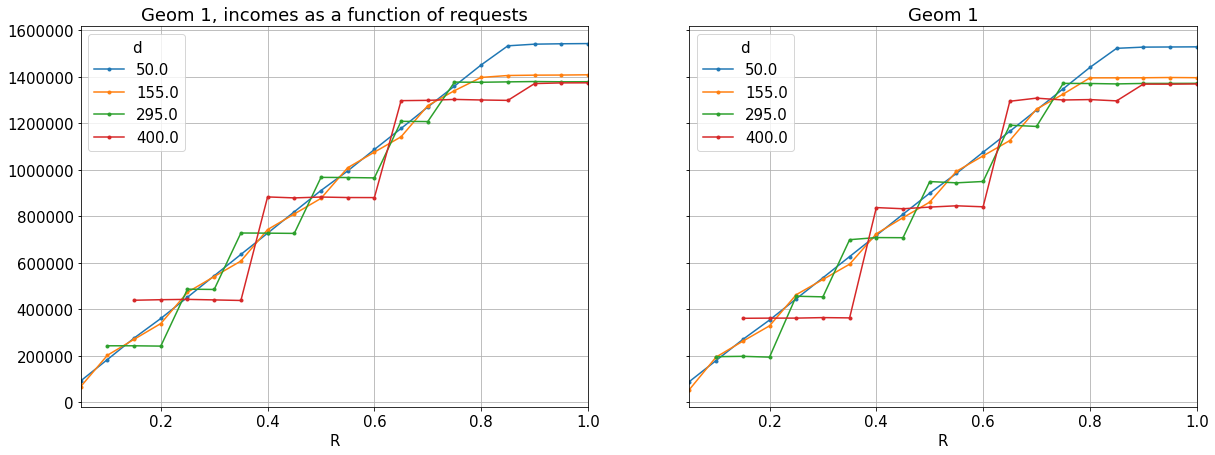

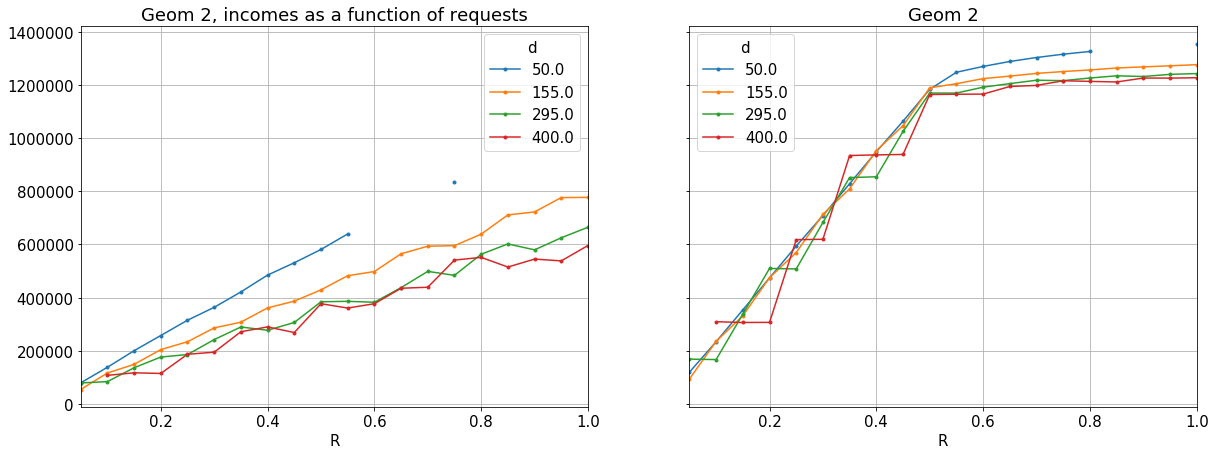

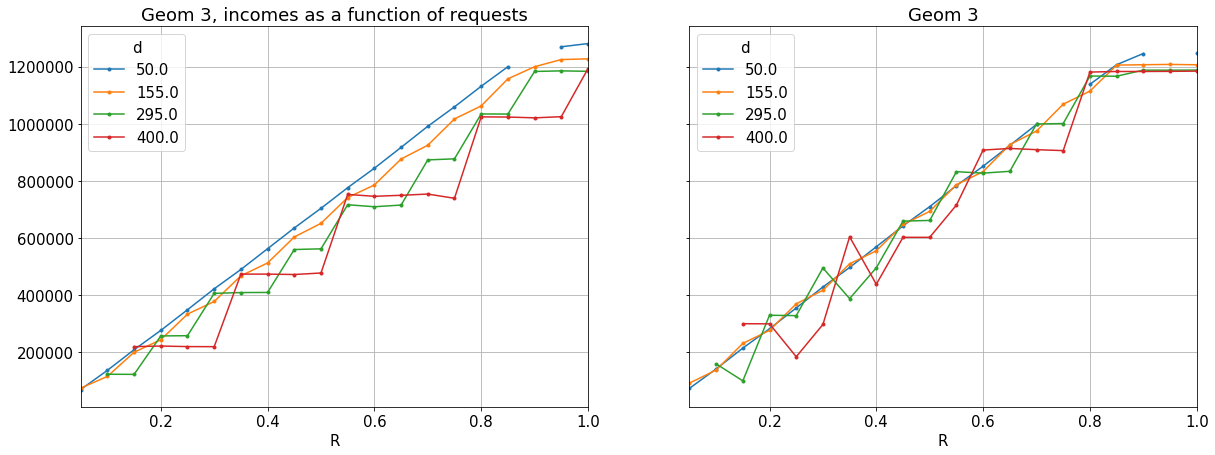

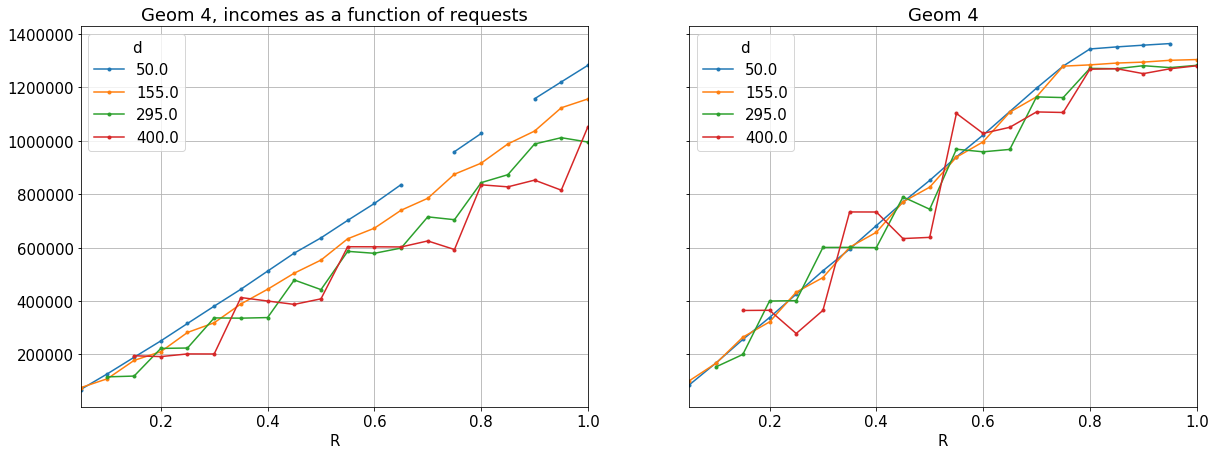

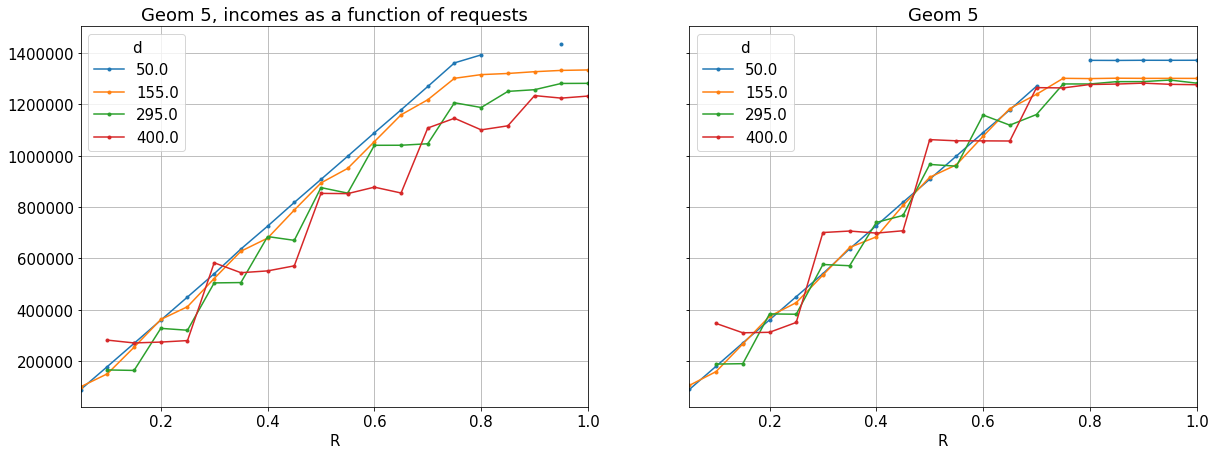

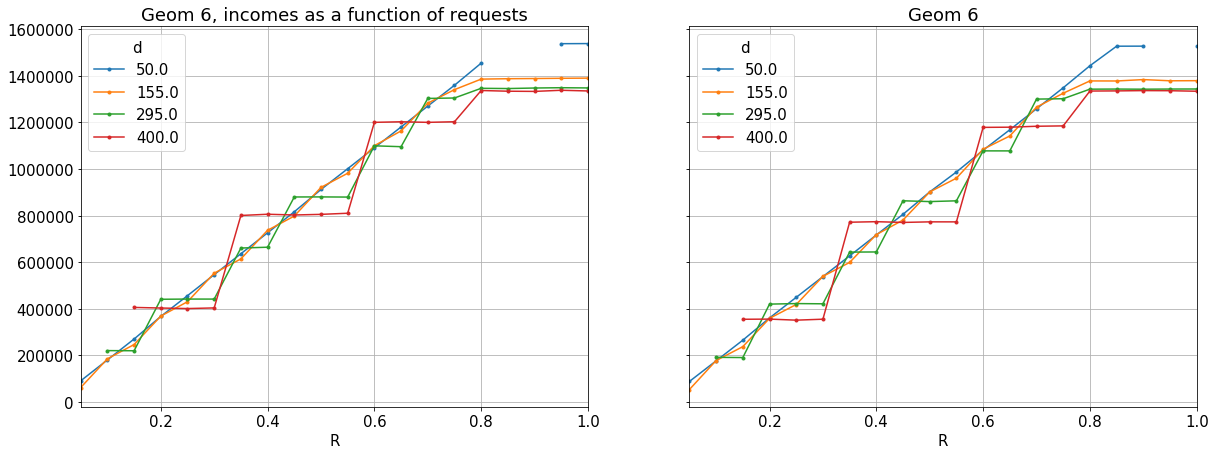

In [43]:
cond1 = df['d'].map(lambda d: d in [50.,155.,295.,400.])
cond2 = df['matching']=='nearest'
cond31 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])
cond32 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    fig, ax = plt.subplots(1,2,sharey=True,figsize=(20,7))
    df[cond1&cond2&cond31&cond4][['d','avg_trip_avg_price','R']]\
        .pivot_table(values='avg_trip_avg_price',index='R',columns='d',aggfunc=lambda x: x)\
        .plot(ax=ax[0], style='.-')
    plt.grid()
    df[cond1&cond2&cond32&cond4][['d','avg_trip_avg_price','R']]\
        .pivot_table(values='avg_trip_avg_price',index='R',columns='d',aggfunc=lambda x: x)\
        .plot(ax=ax[1], style='.-')
    ax[0].set_title('Geom '+str(geom) + ", incomes as a function of requests")
    plt.ylabel("Average income")

A fenti abrakon a bal oldalon az a strategia van, amikor ott maradnak a taxisok, ahol kiraktak az utast, a jobb oldalon pedig az, amikor miutan kiraktak az utast, visszaindulnak a kozpontba.

Azt lattuk, hogy az unfairness meglepoen valtozott a cruising strategiaval (l. fentebb, illetve lentebb), igy azt is meg szerettuk volna nezni, hogy hogyan alakul a bevetel, tehat mennyire jo/rossz atlagos helyzetbol alakul ki az unfairness.

Altalaban a cruising/waiting ugyanarra a bevetelre vezet, kiveve, ha a varosbol kifele meno geometriak vannak (2-es, 4-es), aminel tobb lesz a bevetel, ha a taxisok elkezdenek visszamenni a kozpont fele.

Ilyenkor amellett, hogy a visszameno strategia novel a taxisok bevetelen, csokkenti az unfairnesst is.

A lepcsok lehetseges magyarazata?

In [33]:
#conditions
c1 = df.d == 400
c2 = df.behaviour == "stay"
c3 = df.initial_conditions == "home"
c4 = df.matching == "nearest"
c5 = df.geom == 0
c6 = pd.isnull(df.reset_time)
#c7 = df.R.map(lambda R: R in [0.35,0.4,0.45,0.5])

conds = [c1,c2,c3,c4,c5,c6]

df[np.all(conds,axis=0)]["request_rate"]

17618    1.0
17730    1.0
17842    1.0
17954    1.0
18066    2.0
18178    2.0
18290    2.0
18402    2.0
18514    3.0
18626    3.0
18738    3.0
18850    3.0
18962    4.0
19074    4.0
19186    4.0
19298    4.0
19410    5.0
19522    5.0
Name: request_rate, dtype: float64